# Residual Velocity Testing

Preliminary Code

In [1]:
# Import libraries
import numpy as np
import marvin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[INFO]: No release version set. Setting default to DR17


In [2]:
from marvin import config
config.access

'public'

In [3]:
config.setDR('DR17')
config.release

'DR17'

Code taken from GitHub Issues page to fix API error

In [4]:
from marvin import config
config.switchSasUrl(sasmode='mirror')

# Unnormalised Method

As a proof of concept, implement unnormalised residual velocity technique for one galaxy

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


Min of abs_res:  0.0
Max of abs_res:  58.03580500000001
sum_abs_res:  29688.2294755864


[WARNING]: Warning: converting a masked element to nan. (UserWarning)


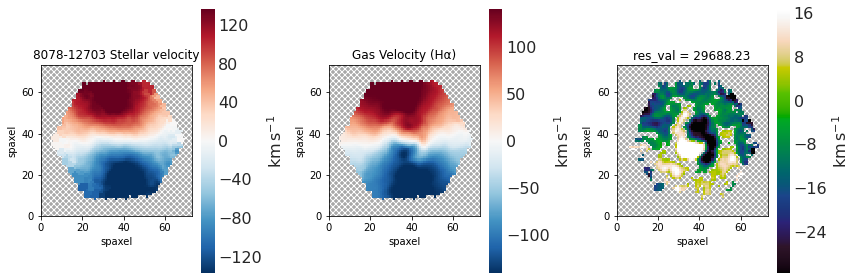

In [55]:
from marvin.tools import Maps
from PIL import Image  # Use Image to generate residual velocity as np.abs is not implemented for EnhancedMap

# Load in test map (bottom-left of Smethurst et al., 2018)
maps = Maps("8078-12703")

# Select stellar velocity
sv = maps.stellar_vel

# Select gas velocity (H-alpha)
gv = maps.emline_gvel_ha_6564


# Calculate absolute residual velocity value
abs_res = np.abs(sv.value - gv.value)
print("Min of abs_res: ", np.min(abs_res))
print("Max of abs_res: ", np.max(abs_res))

# Create residual image
res = sv - gv
res_img = Image.fromarray(abs_res)

# Calculate summed absolute residual velocity value
sum_abs_res = np.sum(abs_res)
print("sum_abs_res: ", sum_abs_res)

# Plot stellar, gaseous and residual velocities
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sv.plot(fig=fig, ax=ax[0], title="8078-12703 Stellar velocity")
gv.plot(fig=fig, ax=ax[1], title="Gas Velocity (Hα)")
res.plot(fig=fig, ax=ax[2], title="res_val = " + "{:.2f}".format(sum_abs_res))
# img = ax[2].imshow(res_img, vmin=np.min(abs_res), vmax=np.max(abs_res))
# ax[2].set_title("res_val = " + "{:.2f}".format(sum_abs_res))
# fig.colorbar(img, shrink=0.75, aspect=5, pad=0.1)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

Now implement for all galaxies in sample. Start by looping over each classification, then combine each array to investigate properties of all 10 together

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8600-12703
Min of abs_res:  0.0
Max of abs_res:  2161.522825
sum_abs_res:  469331.73474568396


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8466-6103
Min of abs_res:  0.0
Max of abs_res:  1714.641518
sum_abs_res:  189491.11500065998


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8726-1901
Min of abs_res:  0.0
Max of abs_res:  1065.7605079999998
sum_abs_res:  34451.864503396006


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8721-12701
Min of abs_res:  0.0
Max of abs_res:  2171.6790800000003
sum_abs_res:  715319.038034361


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8481-6101
Min of abs_res:  0.0
Max of abs_res:  435.77882
sum_abs_res:  61264.87093388599


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8725-1902
Min of abs_res:  0.0
Max of abs_res:  438.37255569999996
sum_abs_res:  39689.6838930031


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8078-12703
Min of abs_res:  0.0
Max of abs_res:  58.03580500000001
sum_abs_res:  29688.2294755864


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8615-6104
Min of abs_res:  0.0
Max of abs_res:  11069.31798
sum_abs_res:  65903.44629189


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


MaNGA ID:  8597-1902
Min of abs_res:  0.0
Max of abs_res:  769.233052
sum_abs_res:  47149.763534159996


[WARNING]: Warning: converting a masked element to nan. (UserWarning)


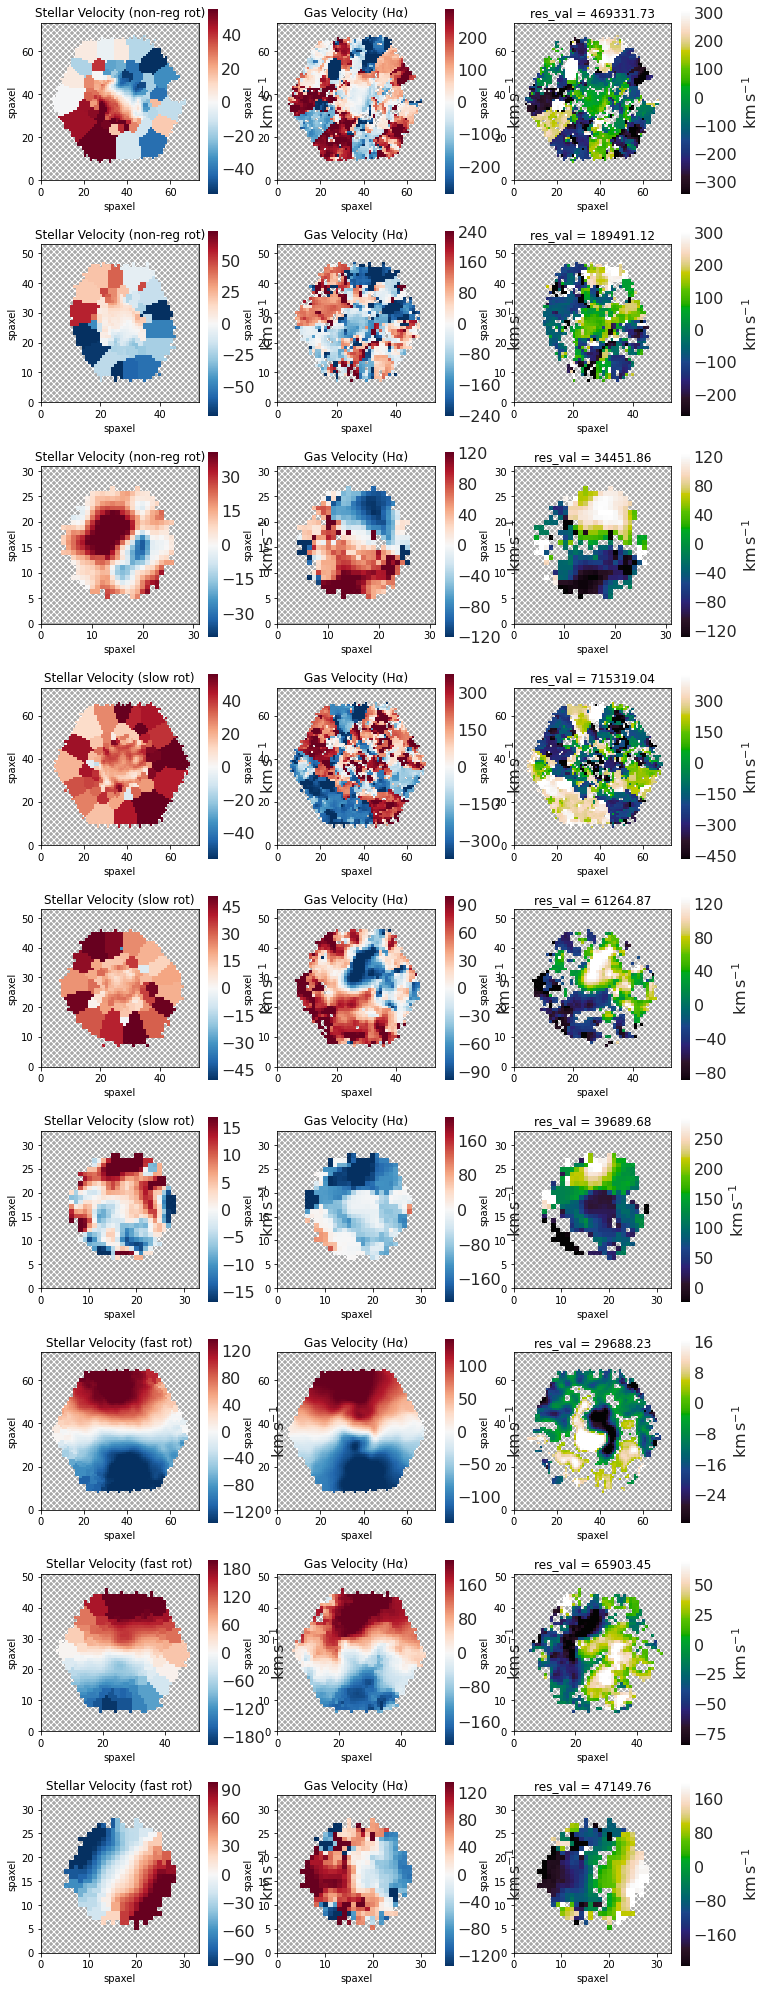

In [61]:
from marvin.tools import Maps

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Combined set of ids (in case studying as one dataset is more helpful/efficient)
combined_ids = non_reg_ids + slow_rot_ids + fast_rot_ids

# Plot initial figure and axes
fig, ax = plt.subplots(nrows=len(combined_ids), ncols=3, figsize=(12, 4*len(combined_ids)))

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Select stellar velocity
    sv = maps.stellar_vel

    # Select gas velocity (H-alpha)
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", non_reg_ids[i])
    
    # Calculate absolute residual velocity value
    abs_res = np.abs(sv.value - gv.value)
    print("Min of abs_res: ", np.min(abs_res))
    print("Max of abs_res: ", np.max(abs_res))

    # Calculate summed absolute residual velocity value
    sum_abs_res = np.sum(abs_res)
    print("sum_abs_res: ", sum_abs_res)

    # Plot stellar, gas and residual velocities along row (left to right)
    sv.plot(fig=fig, ax=ax[i, 0], title="Stellar Velocity (non-reg rot)")
    gv.plot(fig=fig, ax=ax[i, 1], title="Gas Velocity (Hα)")
    res.plot(fig=fig, ax=ax[i, 2], title = "res_val = " "{:.2f}".format(sum_abs_res))
    
# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Select stellar velocity
    sv = maps.stellar_vel

    # Select gas velocity (H-alpha)
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", slow_rot_ids[i])
    
    # Calculate absolute residual velocity value
    abs_res = np.abs(sv.value - gv.value)
    print("Min of abs_res: ", np.min(abs_res))
    print("Max of abs_res: ", np.max(abs_res))

    # Calculate summed absolute residual velocity value
    sum_abs_res = np.sum(abs_res)
    print("sum_abs_res: ", sum_abs_res)

    # Plot stellar, gas and residual velocities along row (left to right)
    sv.plot(fig=fig, ax=ax[i+len(non_reg_ids), 0], title="Stellar Velocity (slow rot)")
    gv.plot(fig=fig, ax=ax[i+len(non_reg_ids), 1], title="Gas Velocity (Hα)")
    res.plot(fig=fig, ax=ax[i+len(non_reg_ids), 2], title = "res_val = " "{:.2f}".format(sum_abs_res))
    
# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])
    
    # Select stellar velocity
    sv = maps.stellar_vel

    # Select gas velocity (H-alpha)
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", fast_rot_ids[i])
    
    # Calculate absolute residual velocity value
    abs_res = np.abs(sv.value - gv.value)
    print("Min of abs_res: ", np.min(abs_res))
    print("Max of abs_res: ", np.max(abs_res))

    # Calculate summed absolute residual velocity value
    sum_abs_res = np.sum(abs_res)
    print("sum_abs_res: ", sum_abs_res)

    # Plot stellar, gas and residual velocities along row (left to right)
    sv.plot(fig=fig, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 0], title="Stellar Velocity (fast rot)")
    gv.plot(fig=fig, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 1], title="Gas Velocity (Hα)")
    res.plot(fig=fig, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 2], title = "res_val = " "{:.2f}".format(sum_abs_res))